In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [90]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]

# define plt and sns styles
sns.set_style("whitegrid")
sns.set_palette("Set2")

### Load Results

In [91]:
obesity = pd.read_csv('obesity/results.csv')
reviews = pd.read_csv('reviews/results.csv')
students_mat = pd.read_csv('student_performance/results-mat.csv')
students_por = pd.read_csv('student_performance/results-por.csv')
votings = pd.read_csv('votings/results.csv')

In [92]:
obesity['dataset'] = 'obesity'
reviews['dataset'] = 'reviews'
students_mat['dataset'] = 'students_mat'
students_por['dataset'] = 'students_por'
votings['dataset'] = 'votings'

results = pd.concat([obesity, reviews, students_mat, students_por, votings])
results.head()


,algorithm,validation_method,remove_outliers,scale_data,use_pca,params,time,conf_matrix,accuracy,precision,recall,f1,dataset,impute_missing_values
0,decision_tree_classifier,cross_validation,True,True,True,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.219827,"[[105.0, 59.0, 23.0, 1.0, 0.0, 47.0, 37.0], [3...",0.592145,0.582803,0.592529,0.581366,obesity,NaN
1,decision_tree_classifier,cross_validation,True,True,True,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.214928,"[[96.0, 62.0, 23.0, 0.0, 0.0, 49.0, 42.0], [28...",0.589777,0.580260,0.596170,0.578790,obesity,NaN
2,decision_tree_classifier,cross_validation,True,True,True,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.214957,"[[94.0, 70.0, 26.0, 2.0, 0.0, 39.0, 41.0], [27...",0.583143,0.571794,0.597019,0.571906,obesity,NaN
3,decision_tree_classifier,cross_validation,True,True,True,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.210095,"[[98.0, 72.0, 23.0, 0.0, 0.0, 41.0, 38.0], [35...",0.585515,0.576126,0.589687,0.573546,obesity,NaN
4,decision_tree_classifier,cross_validation,True,True,True,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.214739,"[[99.0, 74.0, 24.0, 1.0, 0.0, 42.0, 32.0], [30...",0.585989,0.576851,0.593541,0.574585,obesity,NaN


In [93]:
obesity.loc[obesity['f1'].idxmax()]['f1']

0.9629414794215714

In [94]:
obesity.sort_values(by=['f1'], ascending=False).head(3)


,algorithm,validation_method,remove_outliers,scale_data,use_pca,params,time,conf_matrix,accuracy,precision,recall,f1,dataset
459,svm_classifier,cross_validation,False,True,False,"{'C': 10, 'kernel': 'linear'}",0.703308,"[[268.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0], [11.0,...",0.964468,0.963564,0.963359,0.962941,obesity
460,svm_classifier,holdout,False,True,False,default,0.111681,"[[80, 2, 0, 0, 0, 0, 0], [4, 82, 0, 0, 0, 0, 0...",0.955836,0.954409,0.954465,0.954220,obesity
458,svm_classifier,cross_validation,False,True,False,"{'C': 1, 'kernel': 'linear'}",0.410976,"[[268.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0], [18.0,...",0.953105,0.951695,0.952160,0.951271,obesity


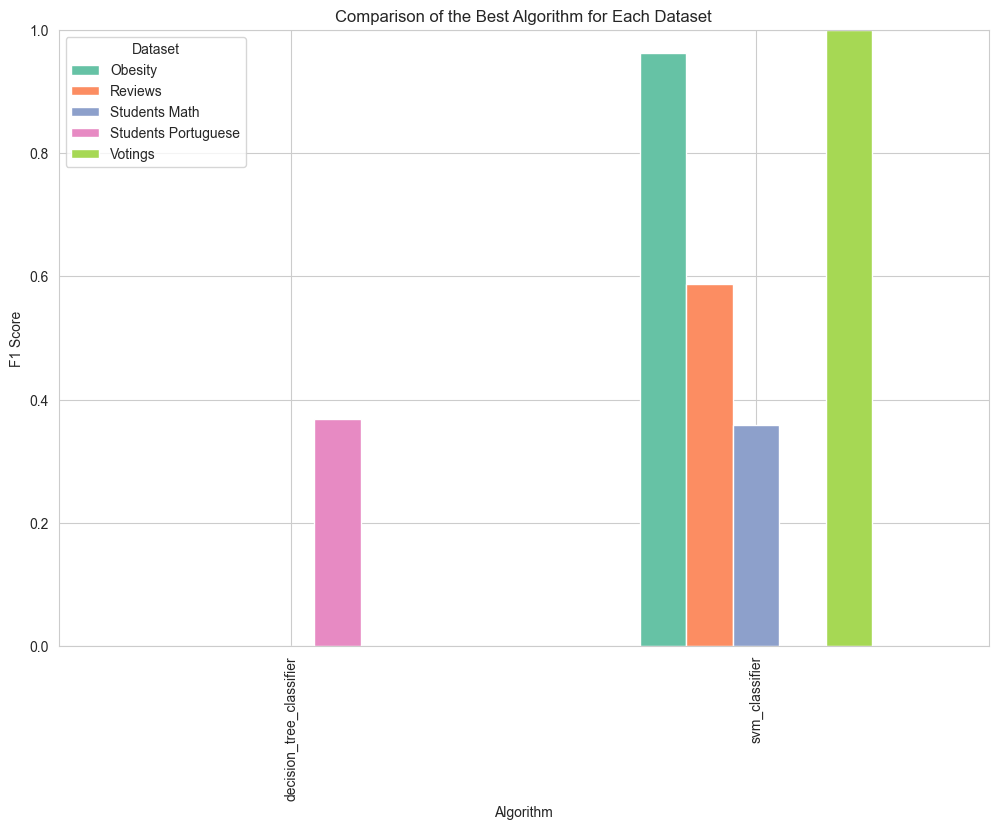

In [95]:
best_obesity = obesity.loc[obesity['f1'].idxmax()]
best_reviews = reviews.loc[reviews['f1'].idxmax()]
best_students_mat = students_mat.loc[students_mat['f1'].idxmax()]
best_students_por = students_por.loc[students_por['f1'].idxmax()]
best_votings = votings.loc[votings['f1'].idxmax()]

data = {
    'Dataset': ['Obesity', 'Reviews', 'Students Math', 'Students Portuguese', 'Votings'],
    'Algorithm': [best_obesity['algorithm'], best_reviews['algorithm'], best_students_mat['algorithm'], best_students_por['algorithm'], best_votings['algorithm']],
    'F1 Score': [best_obesity['f1'], best_reviews['f1'], best_students_mat['f1'], best_students_por['f1'], best_votings['f1']]
}
df = pd.DataFrame(data)

pivot_df = df.pivot(index='Algorithm', columns='Dataset', values='F1 Score')

plt.figure(figsize=(12, 8))
pivot_df.plot(kind='bar', ax=plt.gca())
plt.title('Comparison of the Best Algorithm for Each Dataset')
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.legend(title='Dataset')
plt.show()

### Sensitivity of Parameters

In [96]:
import re
import pandas as pd

def string_to_dict(s):
    pattern = r"'([^']+)':\s*([^,}]+)"
    matches = re.findall(pattern, s)
    return {k: eval(v) for k, v in matches}

obesity['params'] = obesity['params'].apply(lambda x: string_to_dict(x) if isinstance(x, str) else x)
reviews['params'] = reviews['params'].apply(lambda x: string_to_dict(x) if isinstance(x, str) else x)
students_mat['params'] = students_mat['params'].apply(lambda x: string_to_dict(x) if isinstance(x, str) else x)
students_por['params'] = students_por['params'].apply(lambda x: string_to_dict(x) if isinstance(x, str) else x)
votings['params'] = votings['params'].apply(lambda x: string_to_dict(x) if isinstance(x, str) else x)
results['params'] = results['params'].apply(lambda x: string_to_dict(x) if isinstance(x, str) else x)

In [97]:

students_mat.loc[students_mat['f1'].idxmax() and students_mat['validation_method'] == 'cross_validation'].sort_values(by=['f1'], ascending=False).head(1)

,algorithm,validation_method,remove_outliers,scale_data,use_pca,params,time,conf_matrix,accuracy,precision,recall,f1,dataset
466,svm_classifier,cross_validation,True,False,False,"{'C': 10, 'kernel': 'linear'}",0.463083,"[[117.0, 49.0, 15.0, 5.0], [61.0, 52.0, 13.0, ...",0.465726,0.358418,0.350277,0.351691,students_mat


In [98]:
students_mat.loc[(students_mat['validation_method'] == 'cross_validation') & (students_mat['remove_outliers'] == True) & (students_mat['scale_data'] == False) & (students_mat['use_pca'] == False) & (students_mat['algorithm'] == 'svm_classifier')].sort_values(by=['f1'], ascending=False).head(5)

,algorithm,validation_method,remove_outliers,scale_data,use_pca,params,time,conf_matrix,accuracy,precision,recall,f1,dataset
466,svm_classifier,cross_validation,True,False,False,"{'C': 10, 'kernel': 'linear'}",0.463083,"[[117.0, 49.0, 15.0, 5.0], [61.0, 52.0, 13.0, ...",0.465726,0.358418,0.350277,0.351691,students_mat
465,svm_classifier,cross_validation,True,False,False,"{'C': 1, 'kernel': 'linear'}",0.066113,"[[122.0, 47.0, 15.0, 2.0], [67.0, 47.0, 15.0, ...",0.453119,0.326164,0.323088,0.321627,students_mat
464,svm_classifier,cross_validation,True,False,False,"{'C': 0.01, 'kernel': 'linear'}",0.031546,"[[157.0, 29.0, 0.0, 0.0], [110.0, 26.0, 0.0, 0...",0.463278,0.262474,0.682376,0.201370,students_mat


C:\Users\tomad\AppData\Local\Temp\ipykernel_12000\788420121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_svm['C'] = df_svm['params'].apply(lambda x: x.get('C') if x is not None else None)
C:\Users\tomad\AppData\Local\Temp\ipykernel_12000\788420121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_svm['kernel'] = df_svm['params'].apply(lambda x: x.get('kernel') if x is not None else None)


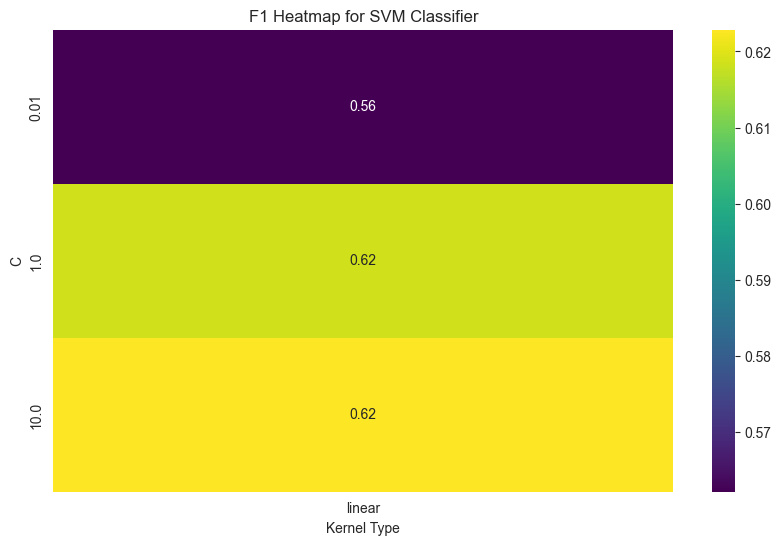

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x600 with 0 Axes>

In [114]:
def create_heatmap_for_svm(df, performance_metric='f1'):
    df_svm = df[df['algorithm'] == 'svm_classifier']
    df_svm['C'] = df_svm['params'].apply(lambda x: x.get('C') if x is not None else None)
    df_svm['kernel'] = df_svm['params'].apply(lambda x: x.get('kernel') if x is not None else None)

    kernel_types = df_svm['kernel'].unique()


    for kernel in kernel_types:
        df_kernel = df_svm[df_svm['kernel'] == kernel]
        pivot_df = df_kernel.pivot_table(index='C', columns='kernel', values=performance_metric, aggfunc='mean')

        plt.figure(figsize=(10, 6))
        sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap='viridis')
        plt.title(f'{performance_metric.capitalize()} Heatmap for SVM Classifier')
        plt.ylabel('C')
        plt.xlabel('Kernel Type')
        plt.savefig(f'./svm_heatmap_parametesr_{kernel}.png')
        plt.show()

create_heatmap_for_svm(results)

C:\Users\tomad\AppData\Local\Temp\ipykernel_12000\2587610940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_svm['max_depth'] = df_svm['params'].apply(lambda x: x.get('max_depth') if x is not None else None)
C:\Users\tomad\AppData\Local\Temp\ipykernel_12000\2587610940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_svm['criterion'] = df_svm['params'].apply(lambda x: x.get('criterion') if x is not None else None)


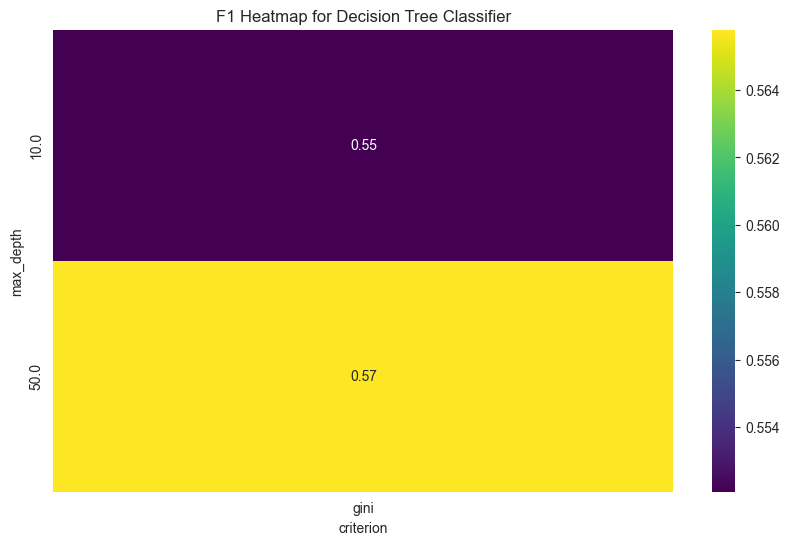

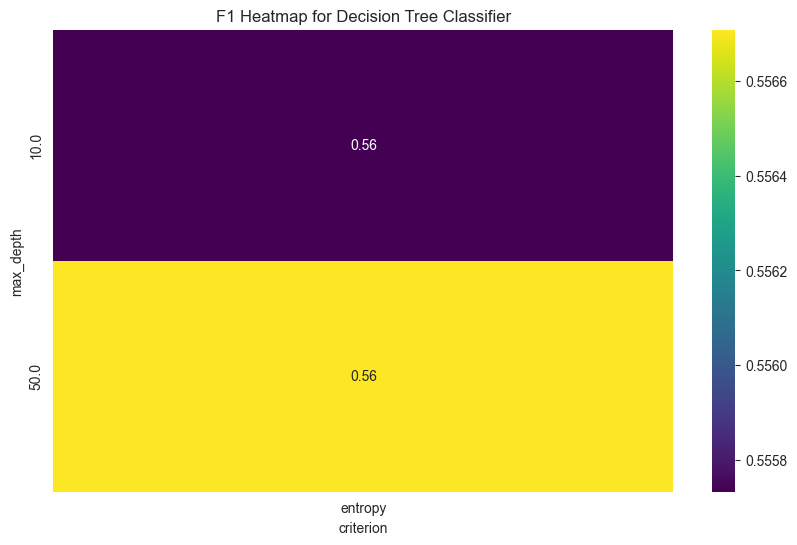

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x600 with 0 Axes>

In [117]:
def create_heatmap_for_dtc(df, performance_metric='f1'):
    df_svm = df[df['algorithm'] == 'decision_tree_classifier']
    df_svm['max_depth'] = df_svm['params'].apply(lambda x: x.get('max_depth') if x is not None else None)
    df_svm['criterion'] = df_svm['params'].apply(lambda x: x.get('criterion') if x is not None else None)

    kernel_types = df_svm['criterion'].unique()


    for kernel in kernel_types:
        df_kernel = df_svm[df_svm['criterion'] == kernel]
        pivot_df = df_kernel.pivot_table(index='max_depth', columns='criterion', values=performance_metric, aggfunc='mean')

        plt.figure(figsize=(10, 6))
        sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap='viridis')
        plt.title(f'{performance_metric.capitalize()} Heatmap for Decision Tree Classifier')
        plt.ylabel('max_depth')
        plt.xlabel('criterion')
        plt.savefig(f'./dtc_heatmap_parametesr_{kernel}.png')
        plt.show()

create_heatmap_for_dtc(results)

C:\Users\tomad\AppData\Local\Temp\ipykernel_12000\4161840833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_algorithm[param_x] = df_algorithm['params'].apply(lambda x: x.get(param_x) if x is not None else None)
C:\Users\tomad\AppData\Local\Temp\ipykernel_12000\4161840833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_algorithm[param_y] = df_algorithm['params'].apply(lambda x: x.get(param_y) if x is not None else None)


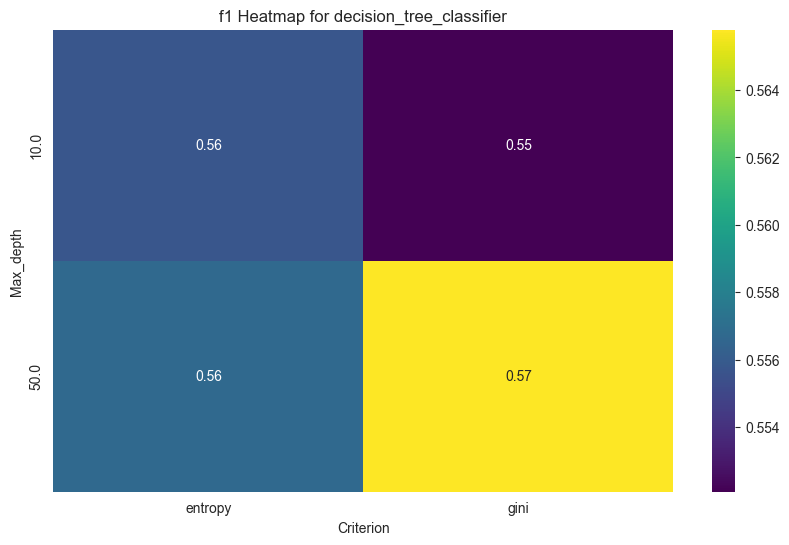

C:\Users\tomad\AppData\Local\Temp\ipykernel_12000\4161840833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_algorithm[param_x] = df_algorithm['params'].apply(lambda x: x.get(param_x) if x is not None else None)
C:\Users\tomad\AppData\Local\Temp\ipykernel_12000\4161840833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_algorithm[param_y] = df_algorithm['params'].apply(lambda x: x.get(param_y) if x is not None else None)


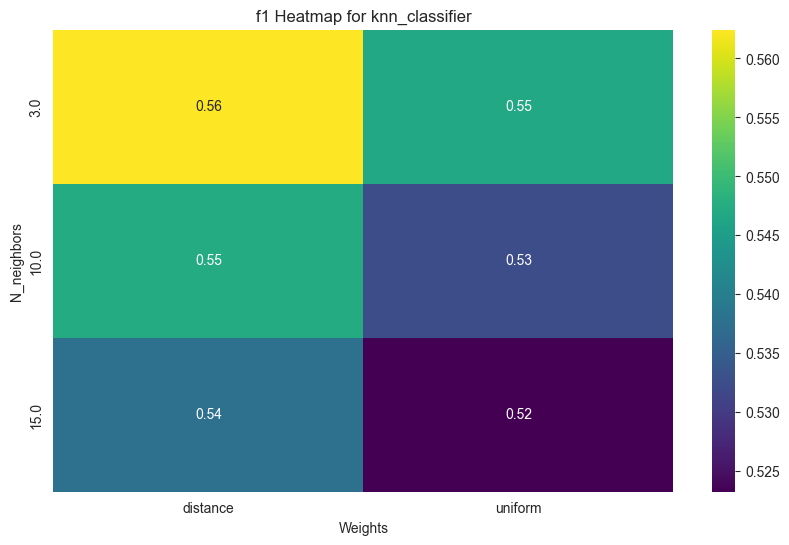

In [124]:
def create_heatmap_for_algorithm(df, algorithm, param_x, param_y, performance_metric='f1'):
    # Filter the dataframe for the specific algorithm
    df_algorithm = df[df['algorithm'] == algorithm]

    # Extract the specified parameters from the params_dict
    df_algorithm[param_x] = df_algorithm['params'].apply(lambda x: x.get(param_x) if x is not None else None)
    df_algorithm[param_y] = df_algorithm['params'].apply(lambda x: x.get(param_y) if x is not None else None)

    # Create a pivot table for the heatmap
    pivot_df = df_algorithm.pivot_table(index=param_x, columns=param_y, values=performance_metric, aggfunc='mean')

    # Creating the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap='viridis')
    plt.title(f'{performance_metric} Heatmap for {algorithm}')
    plt.ylabel(param_x.capitalize())
    plt.xlabel(param_y.capitalize())
    plt.savefig(f'./{algorithm}_heatmap_parametesr_{param_x}_{param_y}.png')
    plt.show()

create_heatmap_for_algorithm(results, 'decision_tree_classifier', 'max_depth', 'criterion')
create_heatmap_for_algorithm(results, 'knn_classifier', 'n_neighbors', 'weights')

### Cross Validation vs Holdout

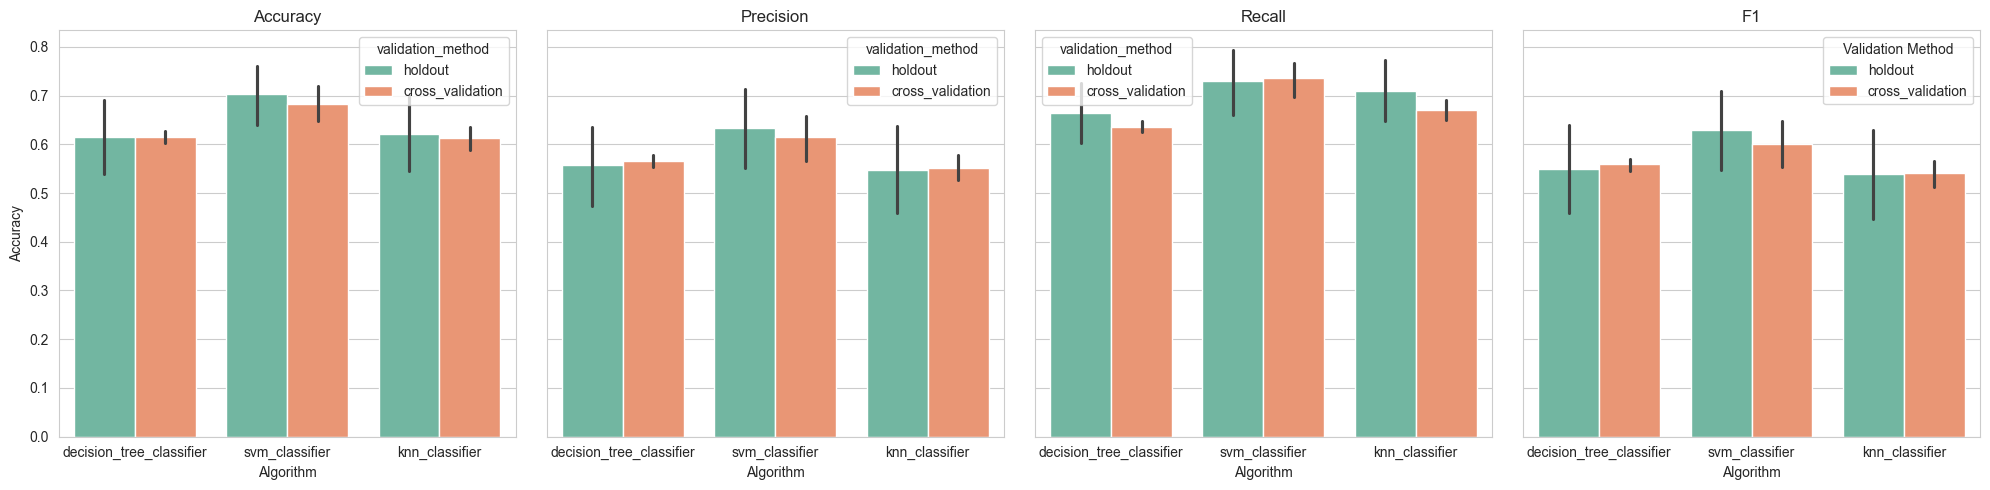

In [25]:
# Separate the DataFrame into two based on the validation method
cross_val_df = results[results['validation_method'] == 'cross_validation']
holdout_df = results[results['validation_method'] == 'holdout']  # This line is hypothetical since the example data doesn't include holdout results

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=True)

# Define a list of metrics
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Plot each metric in a separate subplot
for ax, metric in zip(axes, metrics):
    sns.barplot(x='algorithm', y=metric, hue='validation_method', data=pd.concat([holdout_df, cross_val_df]), ax=ax)
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(metric.capitalize())

# Adjust the layout
plt.tight_layout()

# Display the legend
plt.legend(title='Validation Method')

# Save the figure if needed
plt.savefig('comparison_of_validation_methods.png')

plt.show()

### Comparison of runtime behavior

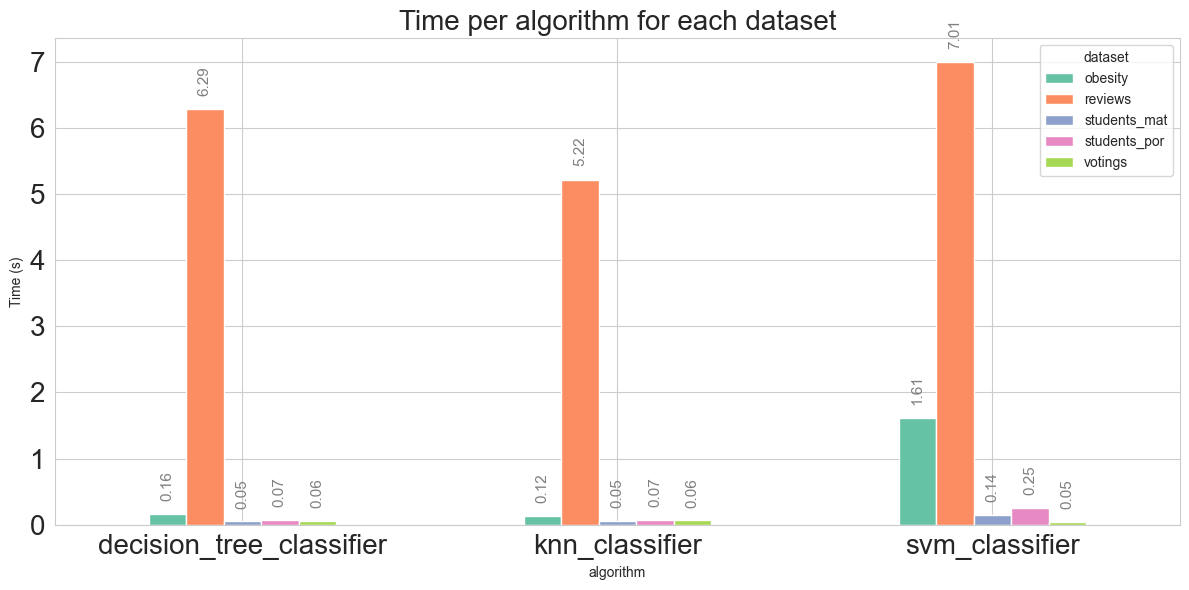

In [24]:

# Pivot the table to get datasets as columns
pivot_df = results.pivot_table(values='time', index='algorithm', columns='dataset', aggfunc='mean')

# Plot the grouped bar chart
pivot_df.plot(kind='bar')

# Set the labels and title
plt.ylabel('Time (s)')
plt.xticks(rotation=0, ha='center')
plt.title('Time per algorithm for each dataset', fontsize=20)

# add values above bars which are perfectly aligned with the bars
for p in plt.gca().patches:
    plt.gca().annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='gray', rotation=90, xytext=(0, 20),
                       textcoords='offset points')

# Make text bigger
plt.gcf().axes[0].tick_params(labelsize=20)

# Adjust the layout
plt.tight_layout()

# Save the figure
plt.savefig('time_per_dataset.png')

plt.show()